<h1>Fišerův problém z nadhledu</h1>

<div style="width:70%; margin-top: 1em;">
<p>Motto:</p>
<p><i>Science is built of facts the way a house is built of bricks:
    but an accumulation of facts is no more science than a pile
    of bricks is a house.</i>
<div style="float: right;">Henri Poincaré</div>
</p>
</div>

<h2>Nadhled:</h2>
<ul>
<li>Máme naměřená data,</li>
<li>vztah, který by měly splňovat </li>
<li>metodu, která to provede</li>
<li>a vizualizuje výsledky.</li>
</ul>

<p>
Tyto části jsou samy o sobě bezvýznamné, terpve jejich složením dostáváme něco užitečného.
</p>

<p>Dalším příkladem jsou vektory: data + operace s nimi.</p>

<h2>Class, objekt</h2>

<pre>
class jmeno:
      
     def __init__(self,..):
        self... = ...
      
     def funkce(self):
     
        self.promenna = ...
        
#end class        
</pre>


In [1]:
class fis:
    
    def __init__(self,x):                     # inicializace 
        self.x = x                            # znama pouze uvnitr fis
        
    def fun(self):                            # self znamena funkci uvnitr fis
        print("self.x={0}".format(self.x))    # self.x znamena x uvnitr fis, jinak by byla jen uvnitr fun()

In [2]:
c = fis(123)                    

In [3]:
c.fun()

self.x=123


In [4]:
d = fis(['a','b'])

In [5]:
d.fun()

self.x=['a', 'b']


<h3>Vlastnosti:</h3>
<ul>
<li>Sdružení různých logických objektů do jednoho objektu.</li>
<li>Oddělení logických částí (potlačení chaosu).</li>
<li>Snadnější zvládání velkých celků.</li>
<li> „... zaútočíme operátorem tečka ...“(Ziki)</li>
</ul>

<h2>Základní Fišerova třída</h2>

In [6]:
import pandas
import scipy.optimize
class Fisher:
    def __init__(self,filename):
        
        self.popt = []
        self.pcov = []
        
        # ziskani dat
        data = pandas.read_csv(filename)
        
        # vztah C = A * B
        self.T = data['T']
        self.C = data['A'] * data['B']
    
    def f(self,x,C0,C1):
          return C0 * x + C1  
    
    def fit(self):
        self.popt, self.pcov = scipy.optimize.curve_fit(self.f, self.T, self.C)
        print("Best fit line parameters: C0={0:.3f}, C1={1:.3f}".format(self.popt[0],self.popt[1]))

In [7]:
# Řešení Fišerova problému
problem = Fisher('data.csv')
problem.fit()

Best fit line parameters: C0=0.628, C1=70.218


<h2>Modifikovaná Fišerova třída</h2>

In [8]:
class FisherModified(Fisher):
    def f(self,x,C0,C1):
        return C0 * x + C1 - 30

In [9]:
problem = FisherModified('data.csv')
problem.fit()

Best fit line parameters: C0=0.628, C1=100.218


<h2>Fišerova třída s grafem</h2>

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

# initializace matplotlib
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 12, 7
plt.rcParams['axes.labelsize'] = 25
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['font.size'] = 25
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 12
plt.rcParams['legend.fontsize'] = 25
        
class FisherGraph(Fisher):
    def __init__(self,filename):
        
        # initializace Fishera
        Fisher.__init__(self,filename)

    def graph(self,xlim,xlabel,ylabel,title):

        if len(self.popt) == 0:
            print("Variable popt is undefined. Run .fit() first of all.")
            return
        
        y = self.f(self.T, self.popt[0], self.popt[1]) # y = C0 * x + C1
        plt.clf()
        plt.cla()
        plt.plot(self.T, self.C, 'o', label='data')
        plt.plot(self.T, y, label=r'$y = C_0 \, x + C_1$')
        plt.legend(loc='best')
        plt.xlim(xlim)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        

Best fit line parameters: C0=0.628, C1=70.218


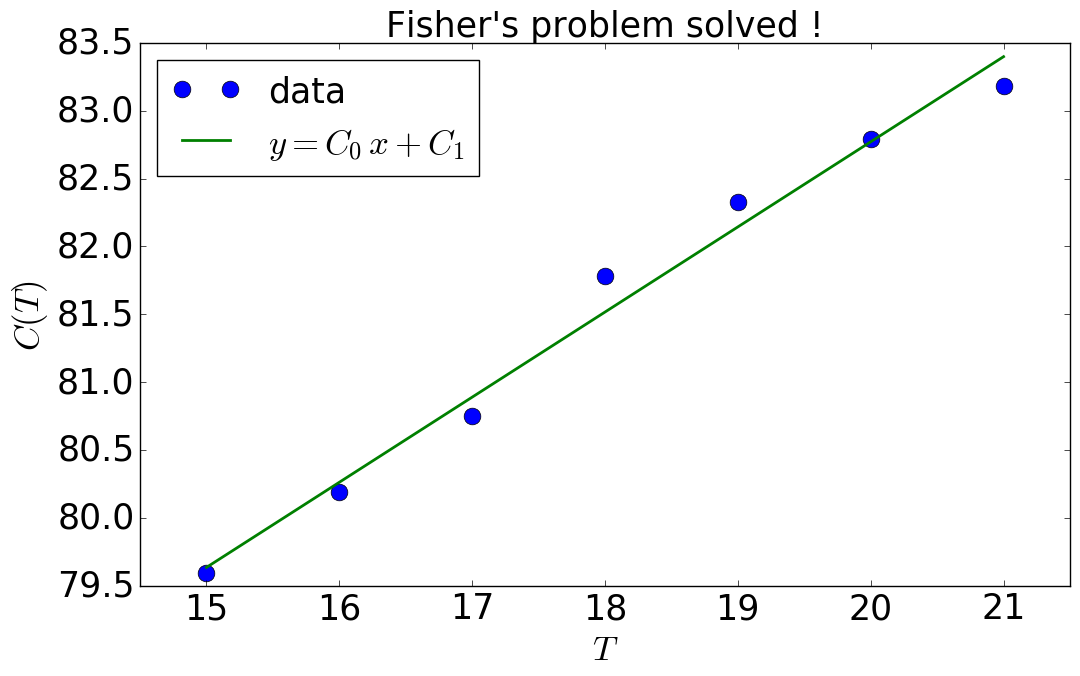

In [11]:
problem = FisherGraph('data.csv')
problem.fit()
problem.graph([14.5, 21.5],"$T$","$C(T)$","Fisher's problem solved !")

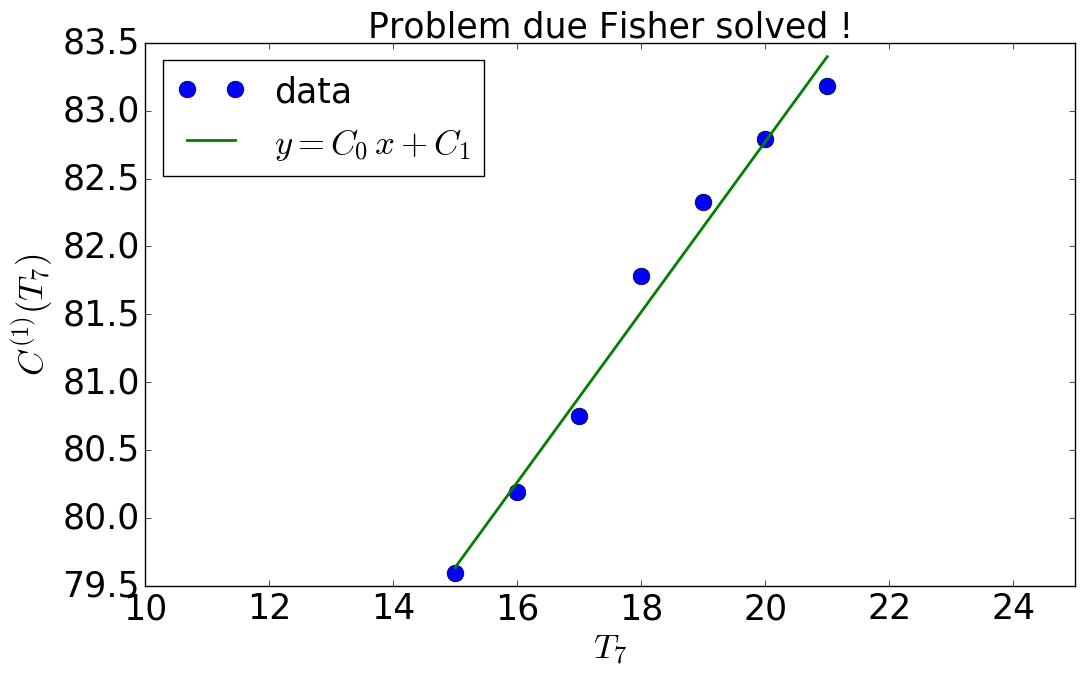

In [12]:
problem.graph([10, 25],"$T_7$","$C^{(1)}(T_7)$","Problem due Fisher solved !")

<p>... teď směle vykročte na cestu ...</p>